## k-近邻算法（KNN）采用测量不同特征值之间的距离算法进行分类  
![title.png](./picture/02k-近邻算法.png)

### 工作原理：  
对于训练样本集，每个样本集中每个数据都存在标签。在输入没有标签的新数据后，将新数据的每个特征与样本数据集中数据对应的特征进行比较，  
然后算法提取样本集中特征最相似数据的分类标签。一般来说，只选择样本数据集中前k个最相似的数据，因此称为k近邻算法，最后选择k个最相似  
数据中出现次数最多的分类，作为新数据的分类。（__通常k<=20__）

### 举个例子  

有人统计过电影中爱情片和动作片的打斗镜头和接吻镜头，如图显示6部电影的打斗和接吻镜头数。假如有一部未看过电影，如何请确定是爱情片还是动作片呢？ 
我们采用KNN算法来实现

![title.png](./picture/02电影分类.png)    

__首先我们需要统计这个未知电影中存在多少打斗镜头和接吻镜头__

![title.png](./picture/02类型评估.png)  

__然后我们需要计算这个未知电影和样本集中其他电影的距离，并进行从小到大排序__  

![title.png](./picture/02距离计算.png)

__找出k个距离最近的电影，假定这里k=3，则可以判定未知电影是爱情片__

### 总结：  
![title.png](./picture/02k-近邻算法流程.png)

# 举例&代码实现  
<font face="微软雅黑"> <font color="red" size = 6>Talk is cheap， show me the code.</font>

#### 例1：简单分类

In [1]:
from numpy import *
import numpy as np
import operator #运算符计算模块

##### 函数说明

In [2]:
#tile（A,reps） 函数功能：沿着各个维度重复A
A = [1,2]
B = tile(A, (2, 1))
B

array([[1, 2],
       [1, 2]])

In [3]:
#y = x.argsort() 将x中的元素从小到大排列，提取其对应的index(索引)，然后输出到y
x = np.array([1,3,5,7,2,4])
y = x.argsort()
y

array([0, 4, 1, 5, 2, 3], dtype=int64)

In [4]:
#简单的生成一些数据
def creatDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [5]:
def classify0(inX, dataSet, labels, k):
    dataSetsize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetsize, 1)) - dataSet #计算inX同每个样本差值
    
    #计算距离并将距离排序
    sqDiffMat = diffMat**2    
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndices = distances.argsort()
    
    #选择距离最小的k个点并统计
    classCount = {}
    for i in range(k):
        votelabel = labels[sortedDistIndices[i]]
        classCount[votelabel] = classCount.get(votelabel, 0) + 1  #字典读取
    
    #从大到小排序
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [6]:
group, labels = creatDataSet()
classify0([0,0], group, labels, 3)

'B'

#### 例2：改进约会网站配对效果

#### 背景：某用户A发现曾交往过三种类型的人：  
·不喜欢的人  
·魅力一般的人   
·极具魅力的人  

A希望周一至周五约会魅力一般的人，周末约会极具魅力的人，A希望分类软件能更好的匹配

A自己收集了部分数据并存入datingTestSet.txt中，每个样本一行，共1000行，样本具有以下<font color="red" size = 3>特征</font>：  

1.每年的飞行里程数；  
2.玩游戏消耗时间比；  
3.每周消费冰激凌公升数；  

In [7]:
import numpy as np
import pandas as pd 

### 1.数据预处理
#### 1.1 将数据输入分类器之前，先处理数据为分类器可接受格式 

这里的函数输入为文件名字符串，转成样本矩阵和标签向量

In [8]:
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())         #get the number of lines in the file
    returnMat = zeros((numberOfLines,3))        #prepare matrix to return
    classLabelVector = []                       #prepare labels return   
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector

In [9]:
datingDataMat, datingLabels = file2matrix('./data/datingTestSet2.txt')

#### 1.2 数据可视化

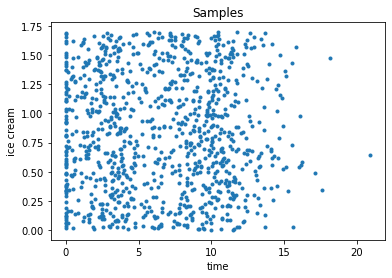

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2], marker = '.') #取样本第二第三列
plt.title('Samples')
plt.xlabel('time')
plt.ylabel('ice cream')
plt.show()

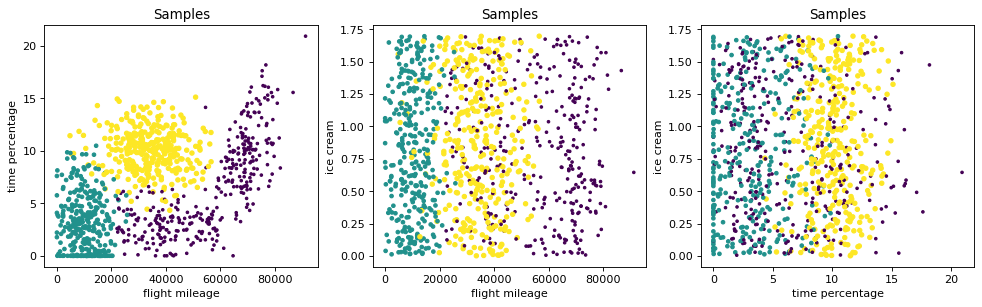

In [11]:
#将样本的label以不同颜色标识出来
fig = plt.figure(figsize=(15,4), dpi=80)
ax = fig.add_subplot(131)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], 5.0 * array(datingLabels), 10.0 * array(datingLabels))
plt.title('Samples')
plt.xlabel('flight mileage')
plt.ylabel('time percentage')

bx = fig.add_subplot(132)
bx.scatter(datingDataMat[:, 0], datingDataMat[:, 2], 5.0 * array(datingLabels), 10.0 * array(datingLabels))
plt.title('Samples')
plt.xlabel('flight mileage')
plt.ylabel('ice cream')

cx = fig.add_subplot(133)
cx.scatter(datingDataMat[:, 1], datingDataMat[:, 2], 5.0 * array(datingLabels), 10.0 * array(datingLabels))
plt.title('Samples')
plt.xlabel('time percentage')
plt.ylabel('ice cream')
plt.show()

#### 从图中可以看出采用飞行常客里程数和玩游戏视频所耗时间百分比对A进行约会对象分类效果明显

#### 1.3 准备数据：归一化

![title.png](./picture/02约会网站原始数据.png)

从这份原始数据中可以看出，如果要计算样本3和样本4之间的距离时，采用欧氏距离的话：
![title.png](./picture/02约会网站原始数据距离计算.png)

数值差值最大的属性对计算结果影响也最大，而产生这种现象的原因仅仅因为飞行里程的数值远大于其他特征，但A认为这三种特征应该具有相同的重要性，  
因此，我们需要将这三种特征放到同样的标准下，这个过程称为归一化。这里采用以下方式将特征控制在0-1之间：
![title.png](./picture/02约会网站原始数据归一化.png)

In [12]:
#归一化
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet / tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

normMat, ranges, minVals = autoNorm(datingDataMat)
print('normMat:', normMat)
print('ranges:', normMat)
print('minVals:', normMat)

normMat: [[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
ranges: [[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
minVals: [[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


### 2.构建分类算法

In [13]:
def datingClassTest(datingDataMat, datingLabels):
    hoRatio = 0.10
    normMat, ranges, minVals = autoNorm(datingDataMat) #归一化
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio) #将数据分为样本和待测试数据
    errorCount = 0.0 #统计错误率
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:], datingLabels[numTestVecs:m], 3) #KNN分类
        print("the classifier came back with: %d, the real answer is : %d" % (classifierResult, datingLabels[i]))
        if(classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount / float(numTestVecs)))

In [14]:
datingDataMat, datingLabels = file2matrix('./data/datingTestSet2.txt')
result = datingClassTest(datingDataMat, datingLabels)

the classifier came back with: 3, the real answer is : 3
the classifier came back with: 2, the real answer is : 2
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 3, the real answer is : 3
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 2, the real answer is : 2
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 1, the real answer is : 1
the classifier came back with: 

### 通过结果可以看出，KNN算法在这个问题上的性能还算不错

#### 进一步，我们对以上程序进行优化，实现用户输入某个人特定信息，系统自动判定A用户对该人的喜欢程度值

In [16]:
import sys

while(True):
    resultList = ['not at all', 'in small does', 'in large does']

    ffMiles = float(input("frequent flier miles earned per year?"))
    percentTats = float(input("percentage of time spent playing video games?"))
    iceCream = float(input("liters of ice cream consumed per year?"))

    atingDataMat, datingLabels = file2matrix('./data/datingTestSet2.txt') #导入已有数据
    normMat, ranges, minVals = autoNorm(datingDataMat) #归一化
    inArr = array((ffMiles, percentTats, iceCream))

    classifierResult = classify0((inArr - minVals) / ranges, normMat, datingLabels, 3)
    print("you will probably like this person:", resultList[classifierResult - 1])
    
    print("Quit?:1/0:")
    inputmessage = (input())  
    if(inputmessage == '1'): break
    elif(inputmessage == '0'):continue 
    else:
        print("Error Command!")
        break;

frequent flier miles earned per year?846254
percentage of time spent playing video games?0.5
liters of ice cream consumed per year?15
you will probably like this person: not at all
Quit?:1/0:
0
frequent flier miles earned per year?4538
percentage of time spent playing video games?2
liters of ice cream consumed per year?14
you will probably like this person: in small does
Quit?:1/0:
0
frequent flier miles earned per year?8642
percentage of time spent playing video games?3
liters of ice cream consumed per year?20
you will probably like this person: in small does
Quit?:1/0:
0
frequent flier miles earned per year?765
percentage of time spent playing video games?2
liters of ice cream consumed per year?15
you will probably like this person: in small does
Quit?:1/0:
1
